# WEB SCRAPING and VISUALIZATION

 ### Installing the beautiful soup library

In [5]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


### Importing the required libraries

In [123]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd

### Selecting the web page and creating the beautifulSoup object

In [2]:
page_url='https://www.weatherbug.com/weather-forecast/10-day-weather/'

In [3]:
page_loaded = requests.get(page_url)

In [4]:
soup = BeautifulSoup(page_loaded.content, 'html.parser')

In [5]:
soup

<!DOCTYPE html>

<html class="is-route-forecasts.10-day-weather" data-ng-controller="WB.AppController as app" data-ng-strict-di="" ng-class="app.bodyClasses()" prefix="fb: http://ogp.me/ns/fb# og: http://ogp.me/ns# article: http://ogp.me/ns/article# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#">
<head>
<!--  TODO: should we/can we preload our webpack bundle? -->
<link href="/dist/styles.css?v=dMcDF__iXWyUz2PnNqv-IiHkk8QLKrIjTyp0ooYSMXY" rel="stylesheet"/>
<!-- Google Tag Manager -->
<script>
            window.dataLayer = window.dataLayer || [];
        </script>
<script>
            var containerId = "GTM-PZG22JQ";
            (function (w, d, s, l, i) {
                w[l] = w[l] || [];
                w[l].push({ "gtm.start": new Date().getTime(), event: "gtm.js" });
                var f = d.getElementsByTagName(s)[0],
                    j = d.createElement(s),
                    dl = l != "dataLayer" ? "&l=" + l : "";
                j.async = true;
       

### Selecting the required tag from html code to extract the needed data

In [53]:
day_cards = soup.find_all('div',class_='day-card')

### Functions to filter the data

In [87]:
def combine_climate_text(raw_list):
    final_string='';
    for s in raw_list:
        final_string=final_string+s+" "
    return final_string
    

In [100]:
def convert_temp_to_int(temp_str):
    temp_numbers=temp_str[0:(len(temp_str))-1]
    return int(temp_numbers)

In [54]:
day_cards

[<div class="day-card">
 <div class="day-card__mobile">
 <div class="day-card__mobile__section">
 <div class="day-card__mobile__section__icon">
 <img alt="Forecast day icon" src="https://d2erwcr27wae6d.cloudfront.net/resources/v1/resource/IconByCodeV1?iconset=forecast&amp;iconSize=svglarge&amp;iconCode=5&amp;token=b2e54818-e934-4643-834f-e3d88437e6f8"/>
 </div>
 <div class="day-card__mobile__section__weather-details">
 <div class="day">
                     Monday
                 </div>
 <div class="description">
                     Rain
                 </div>
 </div>
 <div class="day-card__mobile__section__temp">
                 48°
             </div>
 </div>
 <div class="day-card__mobile__section is-night">
 <div class="day-card__mobile__section__icon">
 <img alt="Forecast night icon" src="https://d2erwcr27wae6d.cloudfront.net/resources/v1/resource/IconByCodeV1?iconset=forecast&amp;iconSize=svglarge&amp;iconCode=14&amp;token=b2e54818-e934-4643-834f-e3d88437e6f8"/>
 </div>
 <div 

### Extracting the data and printing in raw format

In [129]:
days=[]
temparatures=[]
for card in day_cards:
    day_div=card.find('div',class_='day')
    day=day_div.text.split()[0]
    print('day : ',day)
    expected_string_div = card.find('div',class_='description')
    expected_string = expected_string_div.text.split()
    print('expected : ',combine_climate_text(expected_string))
    temparature_div = card.find('div',class_='day-card__mobile__section__temp')
    temparature = temparature_div.text.split()[0]
    print('temparature : ',temparature)
    date_span = card.find('span',class_='date')
    print('date : ',date_span.text)
    
    days.append(day)
    temparatures.append(convert_temp_to_int(temparature))


day :  Monday
expected :  Rain 
temparature :  48°
date :  12/5
day :  Tuesday
expected :  70% Chance Rain Showers 
temparature :  58°
date :  12/6
day :  Wednesday
expected :  Mostly Cloudy 
temparature :  68°
date :  12/7
day :  Thursday
expected :  Mostly Sunny 
temparature :  70°
date :  12/8
day :  Friday
expected :  50% Chance Rain Showers 
temparature :  68°
date :  12/9
day :  Saturday
expected :  Partly Sunny 
temparature :  58°
date :  12/10
day :  Sunday
expected :  40% Chance Rain Showers 
temparature :  54°
date :  12/11
day :  Monday
expected :  40% Chance Rain Showers 
temparature :  53°
date :  12/12
day :  Tuesday
expected :  Mostly Cloudy 
temparature :  53°
date :  12/13
day :  Wednesday
expected :  Partly Cloudy 
temparature :  54°
date :  12/14


## Visualization

### Bar chart plotting (days vs temparatures)

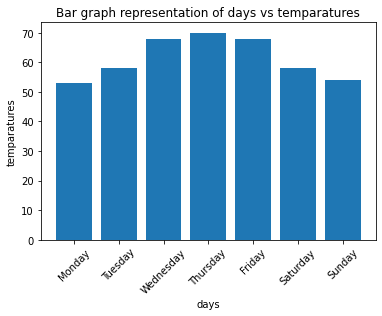

In [119]:
plt.bar(days,temparatures)
plt.xlabel('days')
plt.ylabel('temparatures')
plt.title('Bar graph representation of days vs temparatures')
plt.xticks(rotation = 45)
plt.show()

### Table representation using data frames in pandas

In [134]:
table=[]
dates=[]
for card in day_cards:
    temp_table=[]
    day_div=card.find('div',class_='day')
    day=day_div.text.split()[0]
    
    expected_string_div = card.find('div',class_='description')
    expected_string = expected_string_div.text.split()
    
    temparature_div = card.find('div',class_='day-card__mobile__section__temp')
    temparature = temparature_div.text.split()[0]
    
    date_span = card.find('span',class_='date')
    dates.append(date_span.text)
    
    temp_table.append(day)
    temp_table.append(combine_climate_text(expected_string))
    temp_table.append(temparature)
    table.append(temp_table)

df = pd.DataFrame(table,columns=['day','expected climate','temparature'],index = dates)
df

,day,expected climate,temparature
12/5,Monday,Rain,48°
12/6,Tuesday,70% Chance Rain Showers,58°
12/7,Wednesday,Mostly Cloudy,68°
12/8,Thursday,Mostly Sunny,70°
12/9,Friday,50% Chance Rain Showers,68°
12/10,Saturday,Partly Sunny,58°
12/11,Sunday,40% Chance Rain Showers,54°
12/12,Monday,40% Chance Rain Showers,53°
12/13,Tuesday,Mostly Cloudy,53°
12/14,Wednesday,Partly Cloudy,54°
